# Dog Breed Classification

This notebook lists all the steps that you need to complete the complete this project. You will need to complete all the TODOs in this notebook as well as in the README and the two python scripts included with the starter code.


**TODO**: Give a helpful introduction to what this notebook is for. Remember that comments, explanations and good documentation make your project informative and professional.

**Note:** This notebook has a bunch of code and markdown cells with TODOs that you have to complete. These are meant to be helpful guidelines for you to finish your project while meeting the requirements in the project rubrics. Feel free to change the order of these the TODO's and use more than one TODO code cell to do all your tasks.

In [2]:
# TODO: Install any packages that you might need
# For instance, you will need the smdebug package
!pip install -q smdebug
!pip install -q opencv-python
!pip install -q torch
!pip install -q torchvision --no-cache-dir

In [3]:
# TODO: Import any packages that you might need
# For instance you will need Boto3 and Sagemaker
import os
import sagemaker
import boto3
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision import transforms

import torchvision.models as models
from sagemaker.tuner import (
    IntegerParameter, 
     ContinuousParameter,
     CategoricalParameter, 
     HyperparameterTuner
)

## Dataset
TODO: Explain what dataset you are using for this project. Maybe even give a small overview of the classes, class distributions etc that can help anyone not familiar with the dataset get a better understand of it.

In [4]:
# #TODO: Fetch and upload the data to AWS S3

# # # Command to download and unzip data
# # !wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
# # !unzip dogImages.zip

# # upload the unziped data to AWS S3
# sagemaker_session = sagemaker.Session()
# sagemaker_session.upload_data('dogImages/', bucket='sagemaker-deployment-project', key_prefix='data')

The total classes in train/test/valid data

In [5]:
%matplotlib inline

In [6]:
import os
dataset_type = ['train', 'test', 'valid']
classes = {}
for type in dataset_type:
    classes[type]=os.listdir(f'dogImages/{type}/')
    print(f'There are {len(classes[type])} classes in {type} dataset.')


There are 133 classes in train dataset.
There are 133 classes in test dataset.
There are 133 classes in valid dataset.


The class distributions in /test/valid data

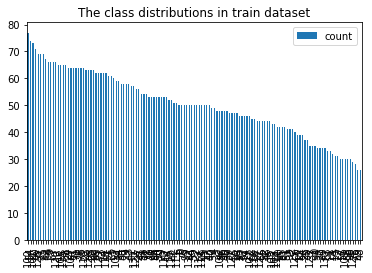

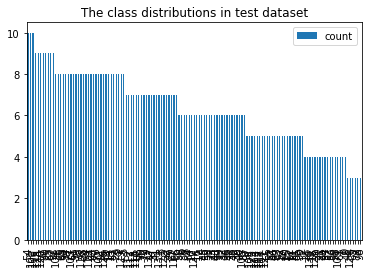

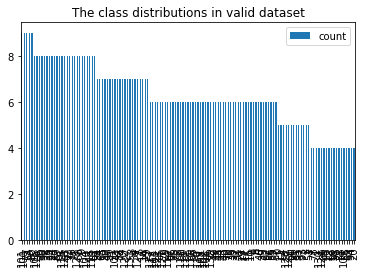

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

dog_breeds_train = {}
train_dir = 'dogImages/train'
for i in os.listdir(train_dir):
    dog_breeds_train[i] = [len(os.listdir(f'{train_dir}/{i}'))]

dog_breeds_test = {}
test_dir = 'dogImages/test'
for i in os.listdir(test_dir):
    dog_breeds_test[i] = [len(os.listdir(f'{test_dir}/{i}'))]

dog_breeds_valid = {}
valid_dir = 'dogImages/valid'
for i in os.listdir(valid_dir):
    dog_breeds_valid[i] = [len(os.listdir(f'{valid_dir}/{i}'))]

counts_dicts = {'train': dog_breeds_train, 'test': dog_breeds_test, 'valid': dog_breeds_valid }
for k, v in counts_dicts.items():
    classes_counts = pd.DataFrame(v).T.reset_index().rename(columns={'index': 'breed', 0: 'count'})
    classes_counts.sort_values(by='count', ascending=False).plot(kind='bar', label='', title=f'The class distributions in {k} dataset')
    

View some sample images

In [8]:
import glob
import random
from PIL import Image
import cv2

def get_image_files(filepath):
    all_files = []
    for root, dirs, files in os.walk(filepath):
        files = glob.glob(os.path.join(root,'*.jpg'))
        for f in files :
            all_files.append(os.path.abspath(f))
    return all_files

def select_random_image(filespath):
    images = get_image_files(train_filespath)
    # random select a image in specified dataset
    sample_img_file = random.choice(images)
    image = Image.open(sample_img_file)
    plt.imshow(image)
    plt.show()
    
    # image shape
    # Read the image file
    image = cv2.imread(sample_img_file)
    # print the height and width of the image
    print('image.shape: ', image.shape)


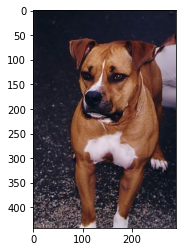

image.shape:  (442, 290, 3)


In [9]:
train_filespath = 'dogImages/train/'
select_random_image(train_filespath)

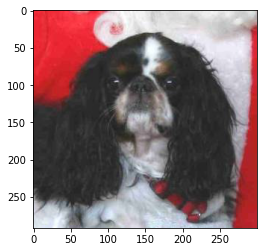

image.shape:  (292, 300, 3)


In [10]:
select_random_image(train_filespath)

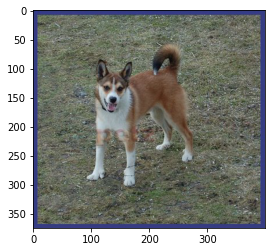

image.shape:  (375, 400, 3)


In [11]:
select_random_image(train_filespath)

check the width and height for the images in train data

In [13]:
import cv2

dataset_folder = 'dogImages/train/'

folders = os.listdir(dataset_folder)
images = []
image_shapes = []
for folder in folders:
    folder_path = os.path.join(dataset_folder, folder)
    for path in os.listdir(folder_path):
        image_path = os.path.join(os.path.join(dataset_folder, folder), path)
        if 'jpg' in image_path:
            image = cv2.imread(image_path)
            # Convert to RGB as OpenCV uses BGR
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
            images.append(image)

            # Obtain shape of each image and store them in an array
            (width, height) = image.shape[1], image.shape[0]
            image_shapes.append((width, height))

# Return only unique shapes
unique_shapes = list(set(image_shapes))

In [14]:
print(f'unique_shapes for the data: ')
unique_shapes

unique_shapes for the data: 


[(375, 356),
 (250, 312),
 (400, 426),
 (346, 500),
 (383, 484),
 (520, 459),
 (629, 508),
 (297, 393),
 (3888, 2592),
 (400, 313),
 (635, 385),
 (319, 360),
 (247, 400),
 (360, 343),
 (342, 561),
 (400, 328),
 (275, 270),
 (936, 692),
 (385, 338),
 (386, 320),
 (353, 360),
 (500, 489),
 (300, 254),
 (300, 331),
 (389, 640),
 (563, 640),
 (675, 474),
 (325, 349),
 (589, 640),
 (517, 638),
 (384, 289),
 (496, 368),
 (650, 516),
 (600, 443),
 (598, 465),
 (250, 323),
 (526, 370),
 (551, 350),
 (572, 801),
 (1800, 2290),
 (994, 1004),
 (900, 675),
 (706, 590),
 (640, 502),
 (640, 571),
 (554, 554),
 (424, 609),
 (298, 403),
 (600, 356),
 (360, 350),
 (432, 640),
 (638, 586),
 (468, 476),
 (400, 335),
 (380, 334),
 (450, 630),
 (440, 342),
 (225, 225),
 (408, 319),
 (500, 496),
 (498, 500),
 (1024, 576),
 (412, 574),
 (179, 221),
 (275, 388),
 (480, 401),
 (2420, 1834),
 (500, 359),
 (464, 640),
 (120, 120),
 (800, 1002),
 (1024, 767),
 (2256, 1496),
 (163, 132),
 (400, 562),
 (608, 450),


## Hyperparameter Tuning
**TODO:** This is the part where you will finetune a pretrained model with hyperparameter tuning. Remember that you have to tune a minimum of two hyperparameters. However you are encouraged to tune more. You are also encouraged to explain why you chose to tune those particular hyperparameters and the ranges.

**Note:** You will need to use the `hpo.py` script to perform hyperparameter tuning.

In [ ]:
# # # train directly

# from sagemaker.pytorch import PyTorch
# from sagemaker import get_execution_role

# # assigning S3 paths for the training job
# bucket='sagemaker-deployment-project'
# prefix='data'

# s3_data = "s3://{}/{}/".format(bucket, "data")
# s3_output_dir = "s3://{}/{}/".format(bucket, "output")
# s3_model_dir = "s3://{}/{}/".format(bucket, "model-artifacts/model")

# os.environ['SM_CHANNEL_TRAIN']= s3_data
# os.environ['SM_MODEL_DIR']= s3_model_dir
# os.environ['SM_OUTPUT_DATA_DIR']= s3_output_dir

# role = get_execution_role()

# # hyperparameters = {
# #     "batch_size": 64,
# #     "num_classes": 133,
# #     "lr": 0.01,
# # }

# # Create a estimator
# estimator = PyTorch(
#     entry_point="hpo.py",
#     role=role,
#     framework_version ='1.6',
#     py_version='py36',
#     instance_count=1,
#     instance_type="ml.g4dn.12xlarge",
#     code_location='s3://sagemaker-deployment-project/model-artifacts/source',
#     # hyperparameters=hyperparameters
# )

# # estimator = PyTorch(
# #     entry_point="hpo.py",
# #     role=role,
# #     framework_version ='1.6',
# #     py_version='py36',
# #     instance_count=1,
# #     instance_type="ml.c4.4xlarge",
# #     code_location='s3://sagemaker-deployment-project/model-artifacts',
# #     hyperparameters=hyperparameters
# # )

# estimator.fit({"train": s3_data})

In [10]:
#TODO: Declare your HP ranges, metrics etc.

hyperparameter_ranges = {
    "lr": ContinuousParameter(0.001, 0.1),
    "batch_size": CategoricalParameter([32, 64, 128]),
}

In [11]:
#TODO: Create estimators for your HPs
from sagemaker.pytorch import PyTorch
from sagemaker import get_execution_role

role = get_execution_role()

# Create a estimator
estimator = PyTorch(
    entry_point="hpo.py",
    role=role,
    framework_version ='1.6',
    py_version='py36',
    instance_count=1,
    instance_type="ml.g4dn.12xlarge",
    code_location='s3://sagemaker-deployment-project/model-artifacts/source',
)


objective_metric_name = "average test loss"
objective_type = "Minimize"
metric_definitions = [{"Name": "average test loss", "Regex": "Testing Loss: ([0-9\\.]+)"}] 

# Create a tuner
tuner = HyperparameterTuner(
    estimator,
    objective_metric_name,
    hyperparameter_ranges,
    metric_definitions,
    max_jobs=4,
    max_parallel_jobs=2,
    objective_type=objective_type,
)

In [12]:
# assigning S3 paths for the training job
bucket='sagemaker-deployment-project'
prefix='data'

s3_data = "s3://{}/{}/".format(bucket, "data")
s3_output_dir = "s3://{}/{}/".format(bucket, "output")
s3_model_dir = "s3://{}/{}/".format(bucket, "model-artifacts/model")

os.environ['SM_CHANNEL_TRAIN']= s3_data
os.environ['SM_MODEL_DIR']= s3_model_dir
os.environ['SM_OUTPUT_DATA_DIR']= s3_output_dir

In [13]:
# TODO: Fit your HP Tuner
tuner.fit({"train": s3_data})

No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config
No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config


.............................................................................................................................................................................................................................!


In [14]:
# TODO: Get the best estimators and the best HPs

best_estimator = tuner.best_estimator()

#Get the hyperparameters of the best trained model
best_estimator.hyperparameters()


2022-10-25 06:46:51 Starting - Preparing the instances for training
2022-10-25 06:46:51 Downloading - Downloading input data
2022-10-25 06:46:51 Training - Training image download completed. Training in progress.
2022-10-25 06:46:51 Uploading - Uploading generated training model
2022-10-25 06:46:51 Completed - Resource reused by training job: pytorch-training-221025-0636-003-aa086815


{'_tuning_objective_metric': '"average test loss"',
 'batch_size': '"64"',
 'lr': '0.012674954748888564',
 'sagemaker_container_log_level': '20',
 'sagemaker_estimator_class_name': '"PyTorch"',
 'sagemaker_estimator_module': '"sagemaker.pytorch.estimator"',
 'sagemaker_job_name': '"pytorch-training-2022-10-25-06-36-39-620"',
 'sagemaker_program': '"hpo.py"',
 'sagemaker_region': '"us-east-1"',
 'sagemaker_submit_directory': '"s3://sagemaker-deployment-project/model-artifacts/source/pytorch-training-2022-10-25-06-36-39-620/source/sourcedir.tar.gz"'}

## Model Profiling and Debugging
TODO: Using the best hyperparameters, create and finetune a new model

**Note:** You will need to use the `train_model.py` script to perform model profiling and debugging.

In [15]:
# TODO: Set up debugging and profiling rules and hooks
from sagemaker.debugger import (
    Rule,
    DebuggerHookConfig,
    rule_configs,
    ProfilerRule,
    CollectionConfig,
)

rules = [
    # debugging
    Rule.sagemaker(rule_configs.vanishing_gradient()),
    Rule.sagemaker(rule_configs.overfit()),
    Rule.sagemaker(rule_configs.overtraining()),
    Rule.sagemaker(rule_configs.poor_weight_initialization()),
    # profiling
    ProfilerRule.sagemaker(rule_configs.ProfilerReport()),
]

collection_configs=[CollectionConfig(name="CrossEntropyLoss_output_0",parameters={
    "include_regex": "CrossEntropyLoss_output_0", "train.save_interval": "10","eval.save_interval": "1"})]

debugger_config=DebuggerHookConfig(
    collection_configs=collection_configs
)

from sagemaker.debugger import ProfilerConfig, FrameworkProfile

profiler_config = ProfilerConfig(
    system_monitor_interval_millis=500, framework_profile_params=FrameworkProfile(num_steps=10)
)

metric_definitions = [{"Name": "Train Loss", "Regex": "Train Loss: ([0-9\\.]+)"},{"Name": "Test Loss", "Regex": "Testing Loss: ([0-9\\.]+)"}]

hyperparameters={
    'lr': 0.012674954748888564,
    'batch_size': 64,
}

In [17]:
# TODO: Create and fit an estimator
from sagemaker.pytorch import PyTorch
from sagemaker import get_execution_role

role= get_execution_role()

# Create a estimator
estimator = PyTorch(
    entry_point="train_model.py",
    role=role,
    framework_version ='1.6',
    py_version='py36',
    instance_count=1,
    instance_type="ml.g4dn.12xlarge",
    code_location='s3://sagemaker-deployment-project/model-artifacts',
    hyperparameters=hyperparameters,
    debugger_hook_config=debugger_config,
    profiler_config=profiler_config,
    rules=rules,
    metric_definitions = metric_definitions,
)

estimator.fit({'train' : s3_data},wait=True)

2022-10-25 07:25:11 Starting - Starting the training job...
2022-10-25 07:25:41 Starting - Preparing the instances for trainingVanishingGradient: InProgress
Overfit: InProgress
Overtraining: InProgress
PoorWeightInitialization: InProgress
ProfilerReport: InProgress
.........
2022-10-25 07:27:01 Downloading - Downloading input data............
2022-10-25 07:29:02 Training - Downloading the training image...
2022-10-25 07:29:42 Training - Training image download completed. Training in progress.bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2022-10-25 07:29:32,464 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
2022-10-25 07:29:32,512 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2022-10-25 07:29:32,518 sagemaker_pytorch_container.training INFO     Invoking user training script.
2022-10-25 07:29:32,971 sagemaker-training-toolkit INFO     In

In [19]:
# TODO: Plot a debugging output.
training_job_name = estimator.latest_training_job.name
print(f"Training jobname: {training_job_name}")

from smdebug.trials import create_trial
from smdebug.core.modes import ModeKeys
trial = create_trial(estimator.latest_job_debugger_artifacts_path())

print(trial.tensor_names())
print(len(trial.tensor('CrossEntropyLoss_output_0').steps(mode=ModeKeys.TRAIN)))
print(len(trial.tensor('CrossEntropyLoss_output_0').steps(mode=ModeKeys.EVAL)))

Training jobname: pytorch-training-2022-10-25-07-25-10-708
[2022-10-25 07:39:52.642 mxnet-1-6-cpu-py36-ml-t3-medium-b41ed6572394778351801906eea8:480 INFO s3_trial.py:42] Loading trial debug-output at path s3://sagemaker-us-east-1-526539017075/pytorch-training-2022-10-25-07-25-10-708/debug-output


/usr/local/lib/python3.6/site-packages/boto3/compat.py:88: PythonDeprecationWarning: Boto3 will no longer support Python 3.6 starting May 30, 2022. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.7 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)


[2022-10-25 07:39:55.873 mxnet-1-6-cpu-py36-ml-t3-medium-b41ed6572394778351801906eea8:480 INFO trial.py:198] Training has ended, will refresh one final time in 1 sec.
[2022-10-25 07:39:56.940 mxnet-1-6-cpu-py36-ml-t3-medium-b41ed6572394778351801906eea8:480 INFO trial.py:210] Loaded all steps
['CrossEntropyLoss_output_0', 'gradient/VGG_classifier.0.bias', 'gradient/VGG_classifier.0.weight', 'gradient/VGG_classifier.3.bias', 'gradient/VGG_classifier.3.weight', 'gradient/VGG_classifier.6.bias', 'gradient/VGG_classifier.6.weight', 'gradient/VGG_features.0.bias', 'gradient/VGG_features.0.weight', 'gradient/VGG_features.10.bias', 'gradient/VGG_features.10.weight', 'gradient/VGG_features.12.bias', 'gradient/VGG_features.12.weight', 'gradient/VGG_features.14.bias', 'gradient/VGG_features.14.weight', 'gradient/VGG_features.16.bias', 'gradient/VGG_features.16.weight', 'gradient/VGG_features.19.bias', 'gradient/VGG_features.19.weight', 'gradient/VGG_features.2.bias', 'gradient/VGG_features.2.weig

In [20]:
def get_data(trial, tname, mode):
    tensor = trial.tensor(tname)
    steps = tensor.steps(mode=mode)
    vals = []
    for s in steps:
        vals.append(tensor.value(s, mode=mode))
    return steps, vals

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot


def plot_tensor(trial, tensor_name):

    steps_train, vals_train = get_data(trial, tensor_name, mode=ModeKeys.TRAIN)
    print("loaded TRAIN data")
    steps_eval, vals_eval = get_data(trial, tensor_name, mode=ModeKeys.EVAL)
    print("loaded EVAL data")

    fig = plt.figure(figsize=(10, 7))
    host = host_subplot(111)

    par = host.twiny()

    host.set_xlabel("Steps (TRAIN)")
    par.set_xlabel("Steps (EVAL)")
    host.set_ylabel(tensor_name)

    (p1,) = host.plot(steps_train, vals_train, label=tensor_name)
    print("completed TRAIN plot")
    (p2,) = par.plot(steps_eval, vals_eval, label="val_" + tensor_name)
    print("completed EVAL plot")
    leg = plt.legend()

    host.xaxis.get_label().set_color(p1.get_color())
    leg.texts[0].set_color(p1.get_color())

    par.xaxis.get_label().set_color(p2.get_color())
    leg.texts[1].set_color(p2.get_color())

    plt.ylabel(tensor_name)

    plt.show()

loaded TRAIN data
loaded EVAL data
completed TRAIN plot
completed EVAL plot


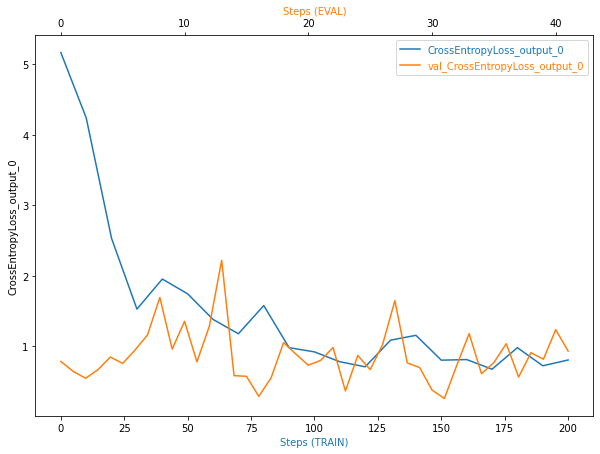

In [22]:
plot_tensor(trial, "CrossEntropyLoss_output_0")

**TODO**: Is there some anomalous behaviour in your debugging output? If so, what is the error and how will you fix it?  

Yes, There is no any point in the debugging output graph when I configured the debugging hook with default parameter`(hook_config = DebuggerHookConfig(hook_parameters={"train.save_interval": "100", "eval.save_interval": "10"})` for the first time. This is because the training steps are too shallow(save_interval=500) and it didn't cover the loss. I created a debugger collection to set the include_regex and save_interval. Below is my final configuration:

`collection_configs=[CollectionConfig(name="CrossEntropyLoss_output_0",parameters={"include_regex": "CrossEntropyLoss_output_0", "train.save_interval": "10","eval.save_interval": "1"})]`

In [23]:
# TODO: Display the profiler output

rule_output_path = estimator.output_path + estimator.latest_training_job.job_name + "/rule-output"
rule_output_path

's3://sagemaker-us-east-1-526539017075/pytorch-training-2022-10-25-07-25-10-708/rule-output'

In [24]:
! aws s3 cp {rule_output_path} ./ --recursive

download: s3://sagemaker-us-east-1-526539017075/pytorch-training-2022-10-25-07-25-10-708/rule-output/ProfilerReport/profiler-output/profiler-reports/BatchSize.json to ProfilerReport/profiler-output/profiler-reports/BatchSize.json
download: s3://sagemaker-us-east-1-526539017075/pytorch-training-2022-10-25-07-25-10-708/rule-output/ProfilerReport/profiler-output/profiler-report.html to ProfilerReport/profiler-output/profiler-report.html
download: s3://sagemaker-us-east-1-526539017075/pytorch-training-2022-10-25-07-25-10-708/rule-output/ProfilerReport/profiler-output/profiler-reports/MaxInitializationTime.json to ProfilerReport/profiler-output/profiler-reports/MaxInitializationTime.json
download: s3://sagemaker-us-east-1-526539017075/pytorch-training-2022-10-25-07-25-10-708/rule-output/ProfilerReport/profiler-output/profiler-reports/Dataloader.json to ProfilerReport/profiler-output/profiler-reports/Dataloader.json
download: s3://sagemaker-us-east-1-526539017075/pytorch-training-2022-10-25-

In [25]:
estimator.latest_training_job.rule_job_summary()

[{'RuleConfigurationName': 'VanishingGradient',
  'RuleEvaluationJobArn': 'arn:aws:sagemaker:us-east-1:526539017075:processing-job/pytorch-training-2022-10-2-vanishinggradient-d59da815',
  'RuleEvaluationStatus': 'NoIssuesFound',
  'LastModifiedTime': datetime.datetime(2022, 10, 25, 7, 38, 6, tzinfo=tzlocal())},
 {'RuleConfigurationName': 'Overfit',
  'RuleEvaluationJobArn': 'arn:aws:sagemaker:us-east-1:526539017075:processing-job/pytorch-training-2022-10-2-overfit-95f0178b',
  'RuleEvaluationStatus': 'NoIssuesFound',
  'LastModifiedTime': datetime.datetime(2022, 10, 25, 7, 38, 6, tzinfo=tzlocal())},
 {'RuleConfigurationName': 'Overtraining',
  'RuleEvaluationJobArn': 'arn:aws:sagemaker:us-east-1:526539017075:processing-job/pytorch-training-2022-10-2-overtraining-d2dc5ef6',
  'RuleEvaluationStatus': 'Error',
  'StatusDetails': 'InternalServerError: We encountered an internal error. Please try again.',
  'LastModifiedTime': datetime.datetime(2022, 10, 25, 7, 38, 6, tzinfo=tzlocal())},
 

In [26]:
import os

# get the autogenerated folder name of profiler report
profiler_report_name = [
    rule["RuleConfigurationName"]
    for rule in estimator.latest_training_job.rule_job_summary()
    if "Profiler" in rule["RuleConfigurationName"]
][0]

In [27]:
import IPython

IPython.display.HTML(filename=profiler_report_name + "/profiler-output/profiler-report.html")

## Model Deploying

In [29]:
# Deploy with PytorchModel for inferencing
model_location= "s3://sagemaker-deployment-project/model-artifacts/model/model.tar.gz" 

import sagemaker
import boto3
from sagemaker import get_execution_role
from sagemaker.pytorch import PyTorchModel
from sagemaker.predictor import Predictor
import torch
import numpy as np

jpeg_serializer = sagemaker.serializers.IdentitySerializer("image/jpeg")
json_deserializer = sagemaker.deserializers.JSONDeserializer()


class ImagePredictor(Predictor):
    def __init__(self, endpoint_name, sagemaker_session):
        super(ImagePredictor, self).__init__(
            endpoint_name,
            sagemaker_session=sagemaker_session,
            serializer=jpeg_serializer,
            deserializer=json_deserializer,
        )
        
pytorch_model = PyTorchModel(
    model_data=model_location, 
    role=get_execution_role(), 
    entry_point='inference.py',
    py_version='py3',
    framework_version='1.6',
    predictor_cls=ImagePredictor) 

In [30]:
# TODO: Deploy your model to an endpoint
predictor = pytorch_model.deploy(initial_instance_count=1, instance_type='ml.g4dn.xlarge')

--------!

In [35]:
# # TODO: Run an prediction on the endpoint

with open("./dogImages/test/008.American_staffordshire_terrier/American_staffordshire_terrier_00538.jpg", "rb") as f:
    payload = f.read()

# type(payload)

# from PIL import Image
# import io
# Image.open(io.BytesIO(payload))

response=predictor.predict(payload, initial_args={"ContentType": "image/jpeg"})

print(f'The prediction label: {np.argmax(response, 1)[0]}')
print(f'prediction:\n {response}')


The prediction label: 7
prediction:
 [[-3.1046929359436035, -3.4655230045318604, 0.42754971981048584, 2.185447931289673, -1.8730956315994263, -3.2056002616882324, 4.787202835083008, 14.169576644897461, -0.561040997505188, -0.7566450834274292, 0.3838750123977661, -1.4351519346237183, -2.937595844268799, 8.2459077835083, -0.8397696614265442, 2.2596921920776367, -2.320124864578247, -2.858726978302002, -2.7777318954467773, 3.4471240043640137, -1.1181564331054688, -2.642096757888794, -3.0275442600250244, -2.500340223312378, -0.40979427099227905, -1.2472259998321533, -0.18943150341510773, -3.4815526008605957, -3.0172765254974365, 0.6257428526878357, -1.8108810186386108, 1.131840705871582, -3.4463768005371094, 11.146041870117188, -1.8982654809951782, -0.5631532073020935, 2.812164068222046, -0.586175262928009, 10.83584213256836, 5.150636672973633, 4.350063800811768, -0.6517245769500732, 7.1926164627075195, 4.163110733032227, 4.509632587432861, -2.185549259185791, -0.8840099573135376, 2.4728059

In [36]:
# TODO: Remember to shutdown/delete your endpoint once your work is done
predictor.delete_endpoint()